In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)


In [15]:
df = pd.read_csv(r'D:\My projects\customer_segmentation_project\data\processed\step4_clustered_customers.csv')
print(f"✓ Loaded data: {df.shape}")

# Load the scaler
with open(r'D:\My projects\customer_segmentation_project\notebooks\outputs\models\scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
print("✓ Loaded scaler")

✓ Loaded data: (2229, 68)
✓ Loaded scaler


In [16]:
# Select numerical features (exclude ID, dates, and cluster labels)
exclude_cols = ['ID', 'Dt_Customer', 'Cluster', 'RFM_Segment', 'Customer_Segment']
feature_cols = [col for col in df.columns if col not in exclude_cols and df[col].dtype in ['int64', 'float64']]

print(f"✓ Selected {len(feature_cols)} features for dimensionality reduction")

# Get scaled features
X_scaled = df[feature_cols].values

✓ Selected 62 features for dimensionality reduction


In [17]:
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculate cumulative variance
cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_90 = np.argmax(cumsum_variance >= 0.90) + 1
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1
n_components_99 = np.argmax(cumsum_variance >= 0.99) + 1

print(f"✓ Components needed for 90% variance: {n_components_90}")
print(f"✓ Components needed for 95% variance: {n_components_95}")
print(f"✓ Components needed for 99% variance: {n_components_99}")


✓ Components needed for 90% variance: 1
✓ Components needed for 95% variance: 1
✓ Components needed for 99% variance: 1


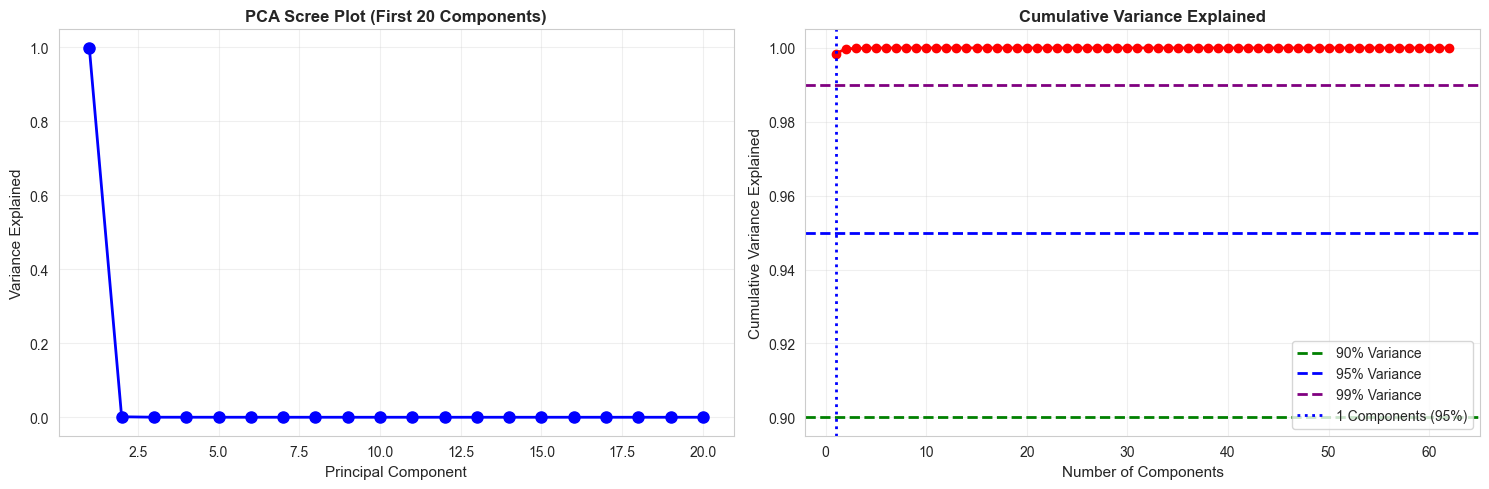

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].plot(range(1, min(21, len(pca_full.explained_variance_ratio_) + 1)), 
             pca_full.explained_variance_ratio_[:20], 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Principal Component', fontsize=11)
axes[0].set_ylabel('Variance Explained', fontsize=11)
axes[0].set_title('PCA Scree Plot (First 20 Components)', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Cumulative variance
axes[1].plot(range(1, len(cumsum_variance) + 1), cumsum_variance, 'ro-', linewidth=2, markersize=6)
axes[1].axhline(y=0.90, color='g', linestyle='--', linewidth=2, label='90% Variance')
axes[1].axhline(y=0.95, color='b', linestyle='--', linewidth=2, label='95% Variance')
axes[1].axhline(y=0.99, color='purple', linestyle='--', linewidth=2, label='99% Variance')
axes[1].axvline(x=n_components_95, color='b', linestyle=':', linewidth=2, 
                label=f'{n_components_95} Components (95%)')
axes[1].set_xlabel('Number of Components', fontsize=11)
axes[1].set_ylabel('Cumulative Variance Explained', fontsize=11)
axes[1].set_title('Cumulative Variance Explained', fontweight='bold', fontsize=12)
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D://My projects/customer_segmentation_project/outputs/figures/step5_pca_variance.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
#  APPLY PCA WITH DIFFERENT DIMENSIONS
pca_2d = PCA(n_components=2, random_state=42)
pca_2d_result = pca_2d.fit_transform(X_scaled)
df['PCA1'] = pca_2d_result[:, 0]
df['PCA2'] = pca_2d_result[:, 1]

print(f"✓ PCA 2D - Variance explained: {pca_2d.explained_variance_ratio_.sum():.2%}")
print(f"  - PC1: {pca_2d.explained_variance_ratio_[0]:.2%}")
print(f"  - PC2: {pca_2d.explained_variance_ratio_[1]:.2%}")

# PCA 3D (for visualization)
pca_3d = PCA(n_components=3, random_state=42)
pca_3d_result = pca_3d.fit_transform(X_scaled)
df['PCA1_3D'] = pca_3d_result[:, 0]
df['PCA2_3D'] = pca_3d_result[:, 1]
df['PCA3_3D'] = pca_3d_result[:, 2]

print(f"✓ PCA 3D - Variance explained: {pca_3d.explained_variance_ratio_.sum():.2%}")
print(f"  - PC1: {pca_3d.explained_variance_ratio_[0]:.2%}")
print(f"  - PC2: {pca_3d.explained_variance_ratio_[1]:.2%}")
print(f"  - PC3: {pca_3d.explained_variance_ratio_[2]:.2%}")

# PCA for 95% variance (optimal dimensions)
pca_optimal = PCA(n_components=n_components_95, random_state=42)
pca_optimal_result = pca_optimal.fit_transform(X_scaled)

# Add optimal PCA components to dataframe
for i in range(n_components_95):
    df[f'PCA_Opt_{i+1}'] = pca_optimal_result[:, i]

print(f"✓ PCA Optimal ({n_components_95}D) - Variance explained: {pca_optimal.explained_variance_ratio_.sum():.2%}")
df.columns

✓ PCA 2D - Variance explained: 99.97%
  - PC1: 99.85%
  - PC2: 0.13%
✓ PCA 3D - Variance explained: 99.99%
  - PC1: 99.85%
  - PC2: 0.13%
  - PC3: 0.01%
✓ PCA Optimal (1D) - Variance explained: 99.85%


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Spending', 'Total_Purchases', 'Children',
       'Customer_Tenure_Days', 'R_Value', 'F_Value', 'M_Value', 'R_Score',
       'F_Score', 'M_Score', 'RFM_Segment', 'RFM_Score', 'Customer_Segment',
       'Education_Level', 'Family_Size', 'Has_Children', 'Avg_Order_Value',
       'Purchase_Frequency_Rate', 'Wine_Ratio', 'Meat_Ratio',
       'Product_Diversity', 'Premium_Product_Ratio', 'Web_Purchase_Ratio',
       'Store_Purchase_Ratio', 'Campaign_Acceptance_Rate', 'Has_Complained'


5. Creating PCA visualizations...
✓ Found 11 clusters: ['Loyal Customers', 'New Customers', 'Champions', 'Potential Loyalists', 'At Risk', 'About to Sleep', 'Promising', 'Need Attention', 'Cannot Lose Them', 'Hibernating', 'Others']


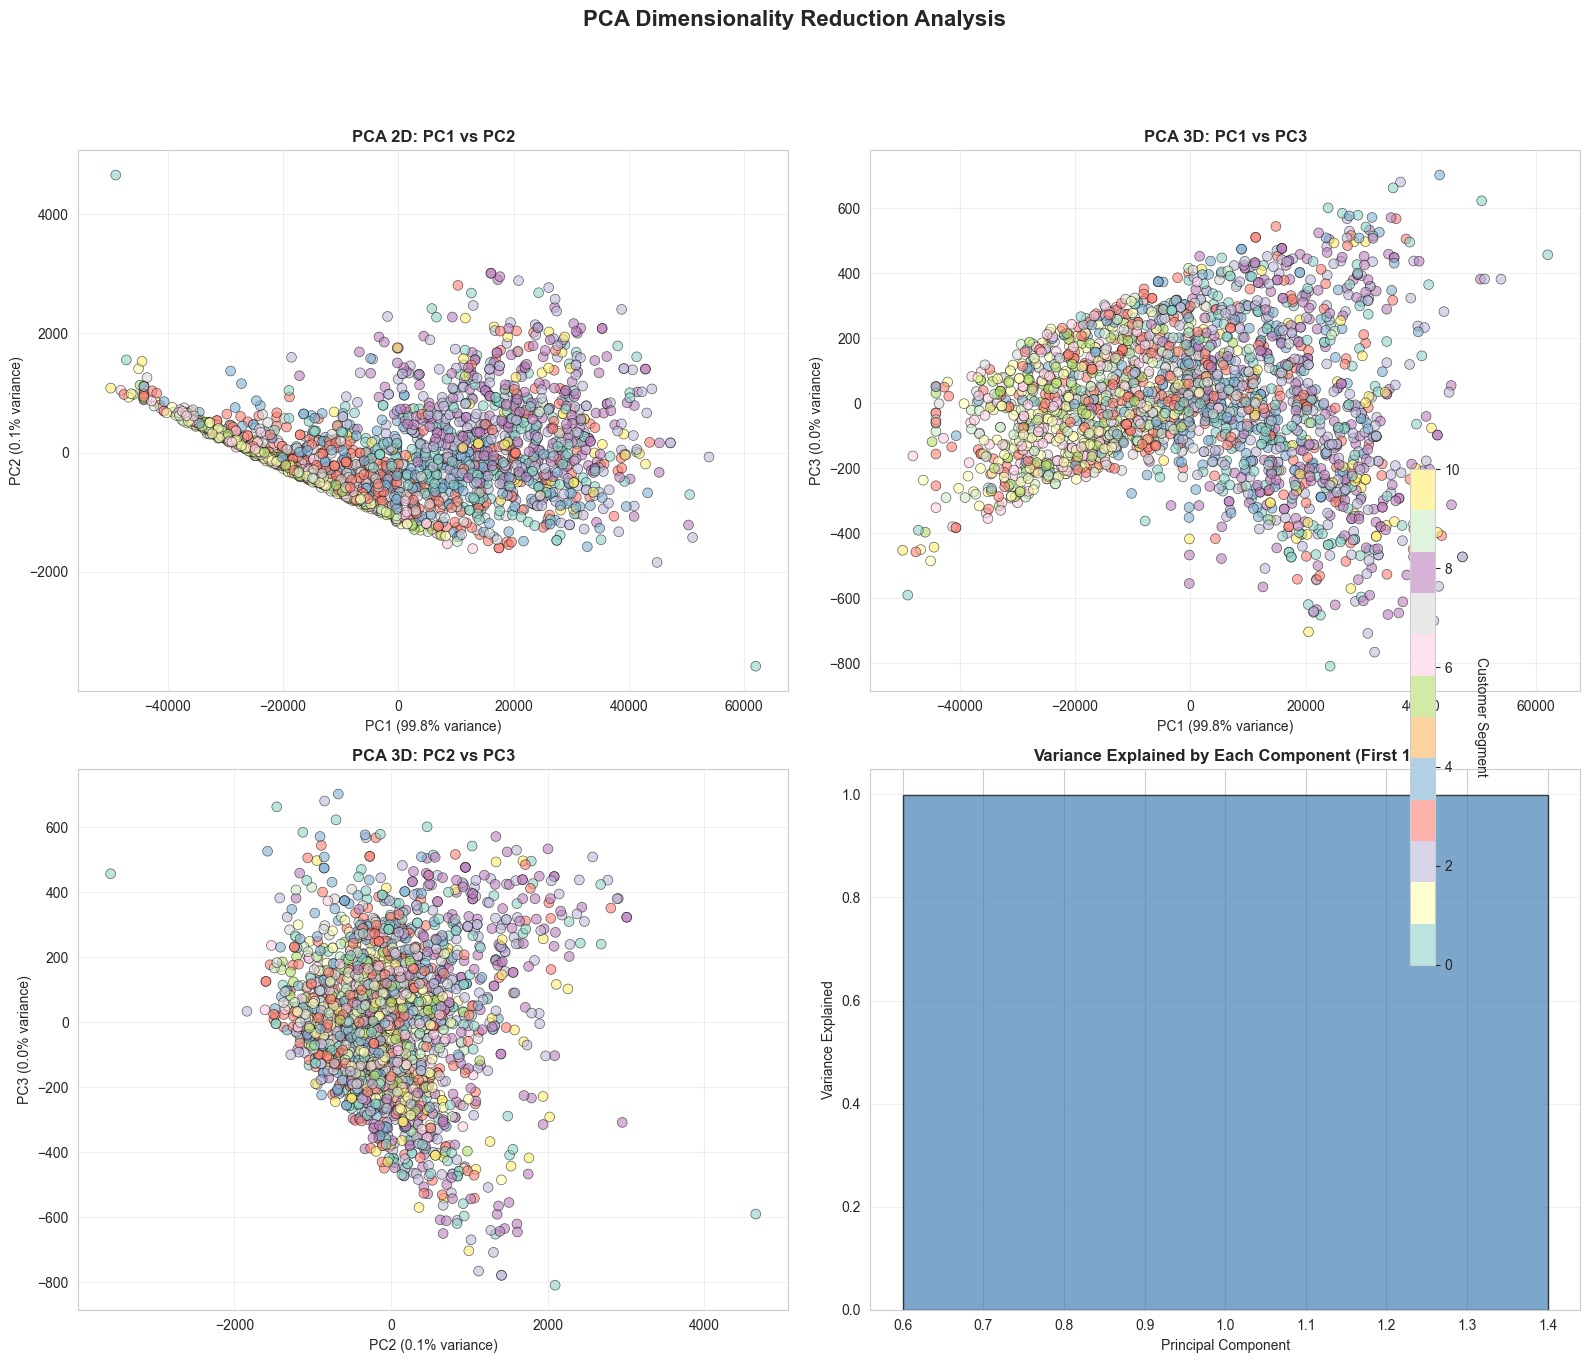

In [24]:


# VISUALIZE PCA RESULTS
print("\n5. Creating PCA visualizations...")

# Get cluster labels and convert them to numeric values
if 'Customer_Segment' in df.columns:
    # Factorize the string labels into numeric codes
    clusters_numeric, unique_labels = df['Customer_Segment'].factorize()
    clusters = clusters_numeric
    n_clusters = len(unique_labels)
    colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))
    print(f"✓ Found {n_clusters} clusters: {unique_labels.tolist()}")
else:
    print("Warning: Customer_Segment column not found.")
    clusters = None
    colors = None
    n_clusters = 0

# Create 2x2 visualization grid
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Plot 1: PCA 2D - PC1 vs PC2
scatter1 = axes[0, 0].scatter(df['PCA1'], df['PCA2'], c=clusters, cmap='Set3', 
                             alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)', fontsize=10)
axes[0, 0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)', fontsize=10)
axes[0, 0].set_title('PCA 2D: PC1 vs PC2', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: PCA 3D - PC1 vs PC3
axes[0, 1].scatter(df['PCA1_3D'], df['PCA3_3D'], c=clusters, cmap='Set3',
                   alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%} variance)', fontsize=10)
axes[0, 1].set_ylabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%} variance)', fontsize=10)
axes[0, 1].set_title('PCA 3D: PC1 vs PC3', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: PCA 3D - PC2 vs PC3
axes[1, 0].scatter(df['PCA2_3D'], df['PCA3_3D'], c=clusters, cmap='Set3',
                   alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%} variance)', fontsize=10)
axes[1, 0].set_ylabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%} variance)', fontsize=10)
axes[1, 0].set_title('PCA 3D: PC2 vs PC3', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Variance explained by each component (bar chart)
if 'n_components_95' in locals() and 'pca_optimal' in locals():
    if n_components_95 <= 20:
        components_to_plot = n_components_95
    else:
        components_to_plot = 20
        
    axes[1, 1].bar(range(1, components_to_plot + 1), 
                   pca_optimal.explained_variance_ratio_[:components_to_plot],
                   color='steelblue', alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel('Principal Component', fontsize=10)
    axes[1, 1].set_ylabel('Variance Explained', fontsize=10)
    axes[1, 1].set_title(f'Variance Explained by Each Component (First {components_to_plot})', 
                         fontsize=12, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
else:
    axes[1, 1].text(0.5, 0.5, 'PCA Optimal results not available.', ha='center', va='center')

# Add colorbar and set labels
if clusters is not None and n_clusters > 0:
    cbar = plt.colorbar(scatter1, ax=axes, fraction=0.02, pad=0.04)
    # Set ticks and labels for the colorbar using original cluster names
    if n_clusters < 10: # Only set labels if number of clusters is small for readability
        cbar.set_ticks(np.arange(n_clusters))
        cbar.set_ticklabels(unique_labels, rotation=45, ha='right')
    cbar.set_label('Customer Segment', rotation=270, labelpad=20, fontsize=10)

plt.suptitle('PCA Dimensionality Reduction Analysis', 
             fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(r'D:\My projects\customer_segmentation_project\outputs\figures\step5_pca_analysis.png', 
            dpi=300, bbox_inches='tight')
plt.show()

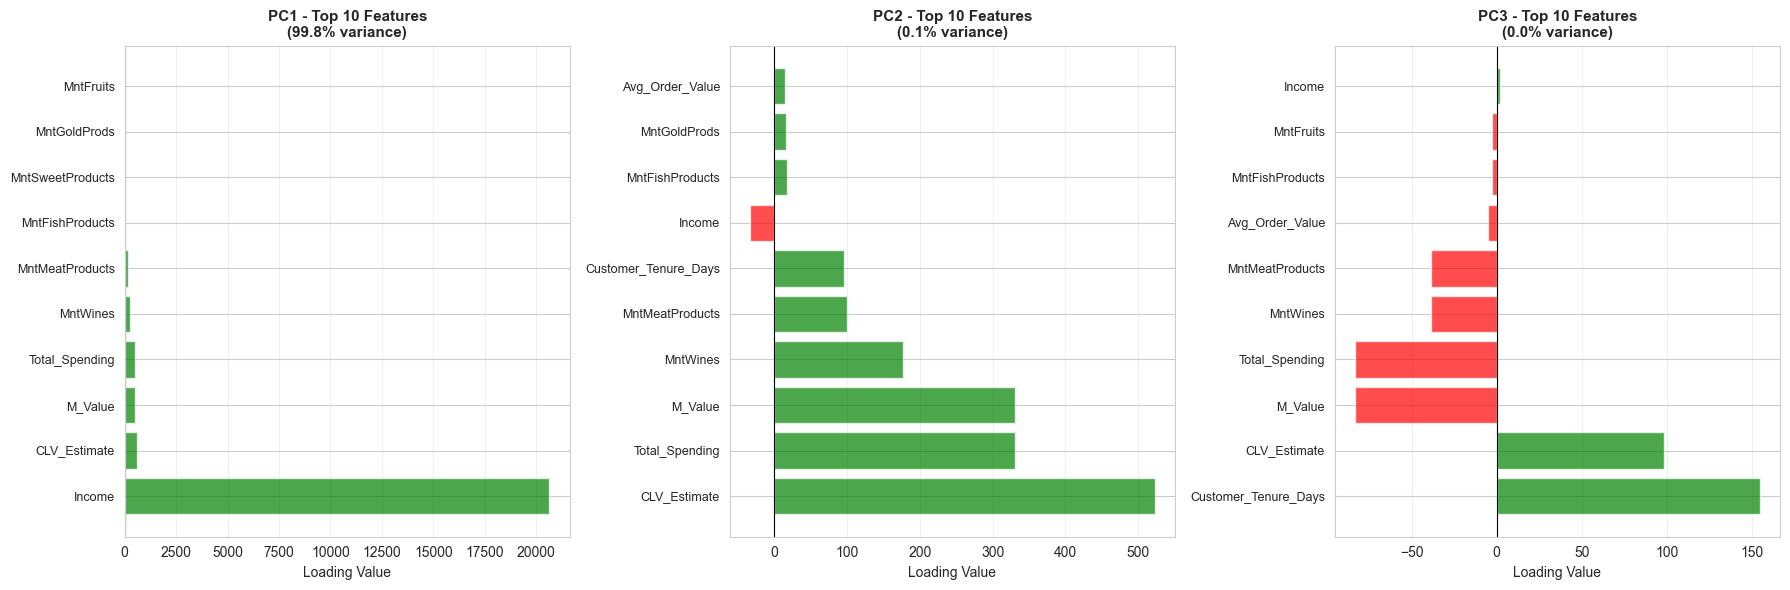


Top 5 Features Contributing to Each Principal Component:
------------------------------------------------------------

PC1:
  + Income: 20601.189
  + CLV_Estimate: 582.724
  + M_Value: 493.526
  + Total_Spending: 493.526
  + MntWines: 245.511

PC2:
  + CLV_Estimate: 522.674
  + Total_Spending: 330.431
  + M_Value: 330.431
  + MntWines: 176.901
  + MntMeatProducts: 99.682

PC3:
  + Customer_Tenure_Days: 154.642
  + CLV_Estimate: 98.061
  - M_Value: 83.351
  - Total_Spending: 83.351
  - MntWines: 38.746


In [26]:
# FEATURE IMPORTANCE IN PRINCIPAL COMPONENTS
loadings = pca_3d.components_.T * np.sqrt(pca_3d.explained_variance_)
loading_df = pd.DataFrame(
    loadings,
    columns=['PC1', 'PC2', 'PC3'],
    index=feature_cols
)

# Get top features for each PC
top_n = 10
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, pc in enumerate(['PC1', 'PC2', 'PC3']):
    top_features = loading_df[pc].abs().nlargest(top_n)
    colors_bar = ['green' if loading_df.loc[feat, pc] > 0 else 'red' 
                  for feat in top_features.index]
    
    axes[i].barh(range(top_n), loading_df.loc[top_features.index, pc], color=colors_bar, alpha=0.7)
    axes[i].set_yticks(range(top_n))
    axes[i].set_yticklabels(top_features.index, fontsize=9)
    axes[i].set_xlabel('Loading Value', fontsize=10)
    axes[i].set_title(f'{pc} - Top {top_n} Features\n({pca_3d.explained_variance_ratio_[i]:.1%} variance)', 
                     fontweight='bold', fontsize=11)
    axes[i].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    axes[i].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('D://My projects/customer_segmentation_project/outputs/figures/step5_pca_feature_importance.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# Print top 5 features for each PC
print("\nTop 5 Features Contributing to Each Principal Component:")
print("-" * 60)
for pc in ['PC1', 'PC2', 'PC3']:
    print(f"\n{pc}:")
    top_5 = loading_df[pc].abs().nlargest(5)
    for feat, value in top_5.items():
        direction = "+" if loading_df.loc[feat, pc] > 0 else "-"
        print(f"  {direction} {feat}: {abs(loading_df.loc[feat, pc]):.3f}")


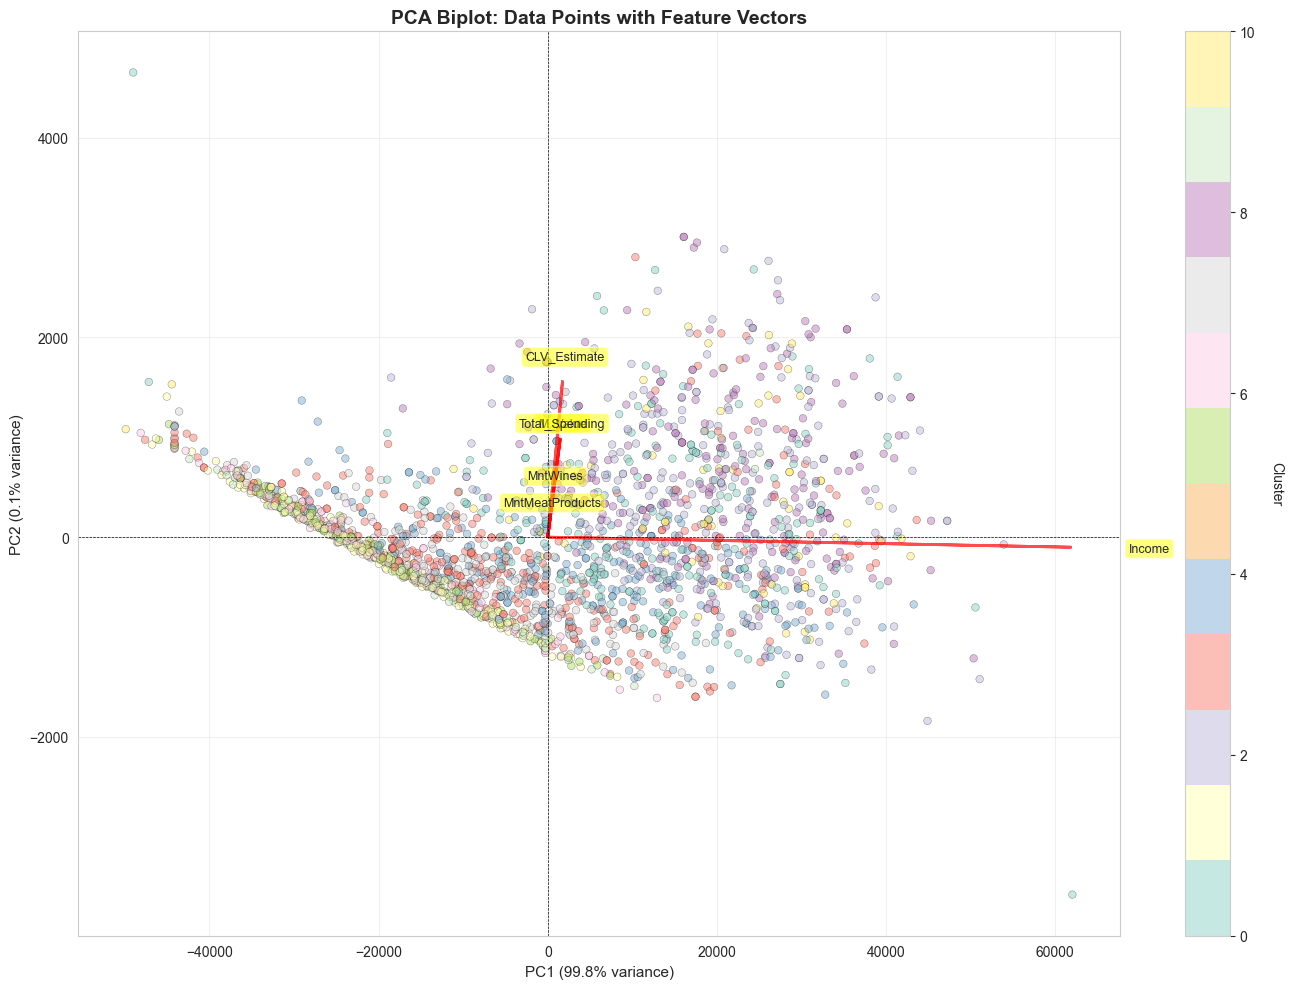

In [27]:
# BIPLOT (PCA with Feature Vectors)
fig, ax = plt.subplots(figsize=(14, 10))

# Plot data points
scatter = ax.scatter(df['PCA1'], df['PCA2'], c=clusters, cmap='Set3',
                    alpha=0.5, s=30, edgecolors='black', linewidth=0.3)

# Plot feature vectors (top 10 by loading magnitude)
scale_factor = 3
top_features_pc1 = loading_df['PC1'].abs().nlargest(5).index
top_features_pc2 = loading_df['PC2'].abs().nlargest(5).index
top_features_combined = list(set(list(top_features_pc1) + list(top_features_pc2)))

for feature in top_features_combined:
    ax.arrow(0, 0, 
             loading_df.loc[feature, 'PC1'] * scale_factor,
             loading_df.loc[feature, 'PC2'] * scale_factor,
             head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7, linewidth=2)
    ax.text(loading_df.loc[feature, 'PC1'] * scale_factor * 1.15,
            loading_df.loc[feature, 'PC2'] * scale_factor * 1.15,
            feature, fontsize=9, ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)', fontsize=11)
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)', fontsize=11)
ax.set_title('PCA Biplot: Data Points with Feature Vectors', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='k', linestyle='--', linewidth=0.5)

if clusters is not None:
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Cluster', rotation=270, labelpad=20, fontsize=10)

plt.tight_layout()
plt.savefig('D://My projects/customer_segmentation_project/outputs/figures/step5_pca_biplot.png', dpi=300, bbox_inches='tight')
plt.show()


In [28]:

# Save the dataframe with PCA results
output_file = 'D://My projects/customer_segmentation_project/data/processed/step5_dimensionality_reduced.csv'
df.to_csv(output_file, index=False)
print(f"✓ Saved results to: {output_file}")

# Save PCA models
with open('D://My projects/customer_segmentation_project/outputs/models/pca_2d.pkl', 'wb') as f:
    pickle.dump(pca_2d, f)
with open('D://My projects/customer_segmentation_project/outputs/models/pca_3d.pkl', 'wb') as f:
    pickle.dump(pca_3d, f)
with open('D://My projects/customer_segmentation_project/outputs/models/pca_optimal.pkl', 'wb') as f:
    pickle.dump(pca_optimal, f)
print("✓ Saved PCA models (2D, 3D, Optimal)")

# Save loading matrix
loading_df.to_csv('D://My projects/customer_segmentation_project/outputs/reports/step5_pca_loadings.csv')
print("✓ Saved PCA loadings")

# Create summary report
summary_data = {
    'Metric': [
        'Original Features',
        'Components for 90% Variance',
        'Components for 95% Variance',
        'Components for 99% Variance',
        'PCA 2D Variance Explained',
        'PCA 3D Variance Explained',
        f'PCA Optimal ({n_components_95}D) Variance'
    ],
    'Value': [
        len(feature_cols),
        n_components_90,
        n_components_95,
        n_components_99,
        f"{pca_2d.explained_variance_ratio_.sum():.2%}",
        f"{pca_3d.explained_variance_ratio_.sum():.2%}",
        f"{pca_optimal.explained_variance_ratio_.sum():.2%}"
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('D://My projects/customer_segmentation_project/outputs/reports/step5_pca_summary.csv', index=False)
print("✓ Saved PCA summary report")

# Save detailed variance explained
variance_df = pd.DataFrame({
    'Component': range(1, len(pca_optimal.explained_variance_ratio_) + 1),
    'Variance_Explained': pca_optimal.explained_variance_ratio_,
    'Cumulative_Variance': np.cumsum(pca_optimal.explained_variance_ratio_)
})
variance_df.to_csv('D://My projects/customer_segmentation_project/outputs/reports/step5_variance_explained.csv', index=False)
print("✓ Saved variance explained details")

✓ Saved results to: D://My projects/customer_segmentation_project/data/processed/step5_dimensionality_reduced.csv
✓ Saved PCA models (2D, 3D, Optimal)
✓ Saved PCA loadings
✓ Saved PCA summary report
✓ Saved variance explained details
